In [1]:
#Gerekli kütüphanelerin import edilmesi
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import nltk#Natural Language Toolkit
from nltk.stem.porter import PorterStemmer#Kelime köklerini bulamak için gerekli olan kütüphane
ps=PorterStemmer()
from nltk.corpus import stopwords

from sklearn.metrics import ConfusionMatrixDisplay#Hata Ayıklama Kütüphanesi
from sklearn.metrics import confusion_matrix#Hata Ayıklama Kütüphanesi

In [2]:
data=pd.read_csv("Valid.csv" ,on_bad_lines='skip')#Datamızın Hazrılanması
data.head()

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [3]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
#Stopwords=Cümle içerisinde anlamı olmayan kelimeler()
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
kapsam=[]
for i in range (5000):
    icerik=re.sub("[a-zA-Z]"," ",data["text"][i])#Harf dışındaki karekterleri boşluk karekteri ile değiştir
    icerik=icerik.lower()#Tüm harfleri küçük harf yap
    icerik=icerik.split()#Cümleleri liste haline getir
    icerik=[ps.stem(kelime) for kelime in icerik if not kelime in set(stopwords.words("english"))]#stopwords olmayan kelimeleri ve kök kelimeleri getir
    icerik=" ".join(icerik)#String hale çevir
    kapsam.append(icerik)#Biriken verileri bir liste de topladım

In [8]:
#Kelime Sayacı;
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=300000)#En fazla kullanılan 300.000 kelimeyi getir
x=cv.fit_transform(kapsam).toarray()#Bağımsız Değişken
y=data["label"]#Bağımlı Değişken

In [9]:
#Veriyi eğitim ve test kümelerine ayırdım
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

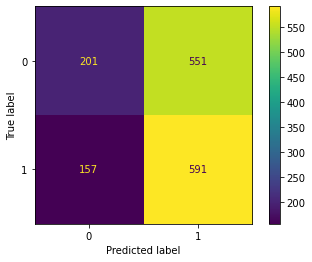

In [13]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion="entropy")
rf.fit(x_train,y_train)#Öğren
y_pred=rf.predict(x_test)#Tahmin Et

#Hata Ayıklama
cm=confusion_matrix(y_test,y_pred)
tabl=ConfusionMatrixDisplay(cm)
tabl.plot()
